In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import networkx as nx

In [ ]:
G = nx.Graph()
# Hex codes for colors if we draw graph
blue, orange, green = "#1f77b4", "#ff7f0e", "#2ca02c"
G.add_nodes_from([
(1, {"color": blue}),
(2, {"color": orange}),
(3, {"color": blue}),
(4, {"color": green})
])
G.add_edges_from([(1,2), (2,3), (1,3), (3,4)])
A = np.asarray(nx.adjacency_matrix(G).todense())
print(A)


[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


In [ ]:
def build_graph_color_label_representation(G, mapping_dict):
  one_hot_idxs = np.array([mapping_dict[v] for v in
  nx.get_node_attributes(G, 'color').values()])
  one_hot_encoding = np.zeros(
  (one_hot_idxs.size, len(mapping_dict)))
  one_hot_encoding[
  np.arange(one_hot_idxs.size), one_hot_idxs] = 1
  return one_hot_encoding
X = build_graph_color_label_representation(
G, {green: 0, blue: 1, orange: 2})
print(X)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


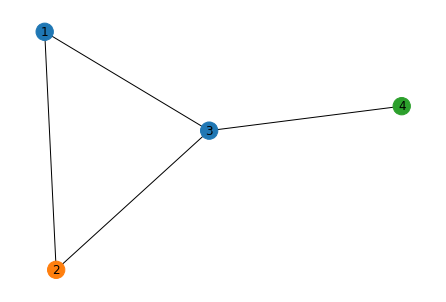

In [ ]:
color_map = nx.get_node_attributes(G, 'color').values()
nx.draw(G,with_labels=True, node_color=color_map)

In [ ]:
f_in, f_out = X.shape[1], 6
W_1 = np.random.rand(f_in, f_out)
W_2 = np.random.rand(f_in, f_out)
h = np.dot(X, W_1)+ np.dot(np.dot(A,X), W_2)
print(h)

[[1.05075782 1.63360181 2.09528603 0.74475913 2.43700331 1.88393122]
 [0.96578686 1.7303207  2.47173019 0.80725629 2.74171154 2.15301368]
 [1.46718419 2.03000988 2.78534199 1.46529275 2.62320865 1.89259465]
 [1.0294416  1.52539844 1.57368334 0.96782001 1.48379654 1.43670558]]
